# Density-dependent growth

When we plot the annual per capita growth rate, $r_t = \log( N_{t+1} / N_t)$, as a function of $N_t$ , we see a pattern emerge. At low $N$, $ r >0$, whereas at high $N$, $r < 0 $. The annual growth rate depends on the size or density of the population. This is the sort of thing we mean when we use the term *density-dependent growth*.

What might limit the population growth of these sparrows? Space available for male territories in their successional-scrub type habitat? Availability of seeds, fruits and invertebrates? We don’t necessarily know precisely what limits it, but if it is something related to their own abundance, then we can treat density as a proxy for the amount of limitation.

Density-dependent population growth is the case where the per capita population growth rate depends statistically on the density of the population. When the slope of that relation is negative as it is in Fig. below, we call this negative density-dependence. Negative density dependence a characteristic of a population undergoing intraspecific competition, where individuals of the same species compete for shared resources and have negative effects on their demographic rates. So, how would we represent this algebraically?

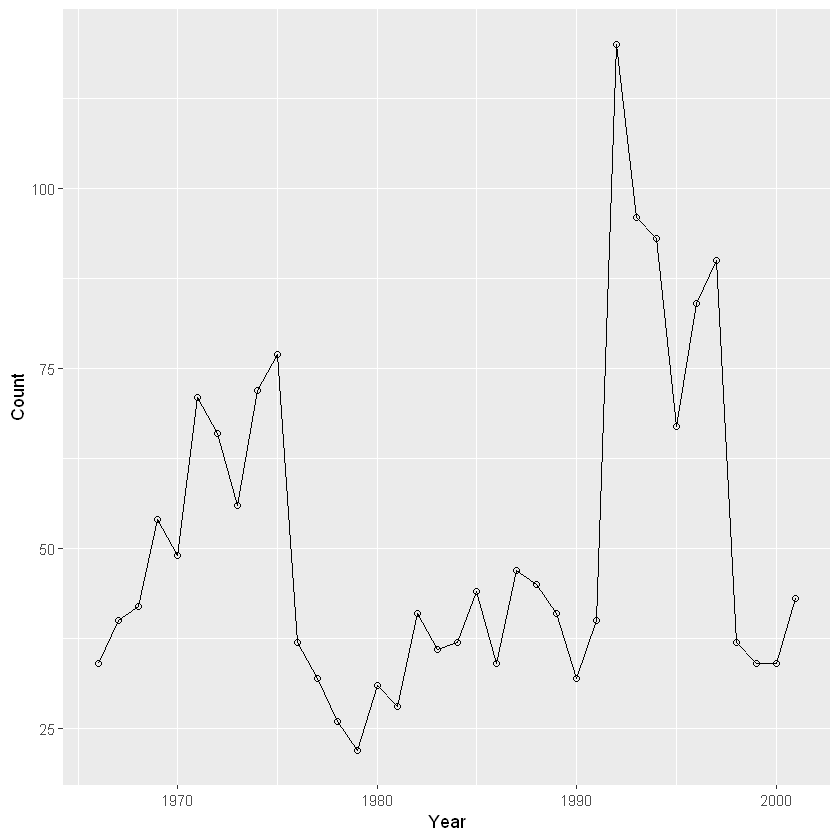

In [17]:
library ('ggplot2')
sparrows <- data.frame (

    Year = c(1966:2001), 
    Count = c( 34, 40, 42, 54, 49, 71, 66, 56, 72, 77, 37, 32, 26, 22, 31, 28, 41, 36, 37, 44, 34, 47, 45, 41, 32, 40, 120, 96, 93, 67, 84, 90, 37, 34, 34, 43) 
    
)
ggplot(sparrows, aes(x=Year, y=Count)) + geom_line() + geom_point(pch=1)

In [19]:
sparrows

Year,Count
1966,34
1967,40
1968,42
1969,54
1970,49
1971,71
1972,66
1973,56
1974,72
1975,77


Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

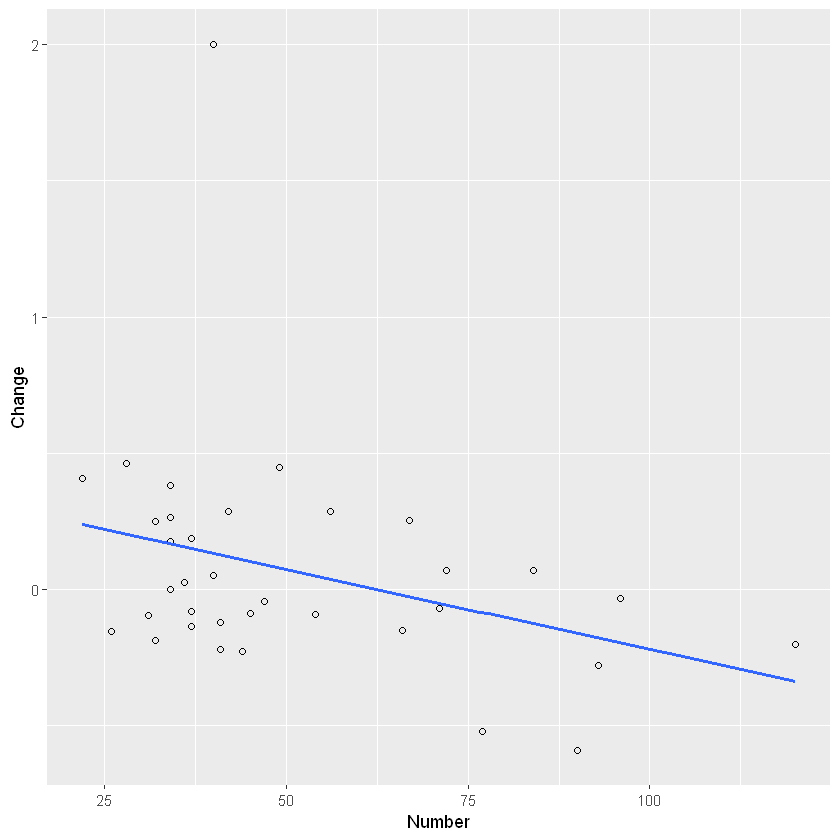

In [21]:
ratio = vector() 
ratio[1] = 1 
total.incr <- sparrows[["Count"]][1:length(sparrows[["Count"]]) +1 ] -sparrows[["Count"]][1:length(sparrows[["Count"]]) ]
per.capita.incr <- total.incr/sparrows[["Count"]][1:length(sparrows[["Count"]]) ]


ratio_frame = data.frame (

    Change = per.capita.incr,
    Number = sparrows[["Count"]]
    
)

ggplot(ratio_frame, aes(x=Number, y=Change)) +  geom_point(pch=1) + geom_smooth(method = 'lm', se = FALSE)

Density dependence means that the population will grow or shrink at a rate that depends on its size. We can imagine that each individual in the population exerts some tiny negative effect on $r_dN_t$ so that the realized per capita growth increment shrinks as $N_t$ grows. 

Let us specify that the negative effect of each individual in the population is the same, regardless of how many individuals there are. That is, we could represent this negative effect with a constant, perhaps $\alpha$ , where $\alpha N_t$  is the total negative effect of all individuals in the population. On average, each individual exerts the same negative impact, with a magnitude $\alpha$, whether there is one individual or 1000 individuals. A particularly convenient way of implementing this is to keep using $r_d$ but to multiply it by a scaling factor. This scaling factor should equal 1 when the population size is zero so that $rd$ $\times$ (scailing factor) $= $ $r_d$. The scaling factor should be zero when the population is so big that per capita growth increment is zero, $rd$ $\times$ (scailing factor) $= $ $0$. One such scaling factor looks like this,

$$
    Per Capita Increment = rd (1 − αNt) 
$$
At precisely what value of $N$ will per capita growth shrink to zero? We can solve this by noting that $r_d$ is a constant and won’t change; all that matters is inside the parentheses. We set the per capita increment equal to zero, and solve for $N_t$.

$$
    0 = r_d (1-\alpha N_t)  
$$
$$
    0 = r_d - r_d \alpha N_t 
$$

$$
    N_t = \frac {1} {\alpha} 
$$
Now instead of density-independent per capita growth, $r_d$, we have density-dependent per capita growth $r_d (1-\alpha N_t) $ and our population growth equation becomes,
$$
    N_{t+1} = N_t + N_t r_d (1-\alpha N_t)
$$
This describes discrete *logistic growth*. A common alternative representation uses $1/α$ symbolized as $K$, 
$$
    N_{t+1} = N_t + N_t r_d (1-\frac {N_t} {K})
$$
where $K$ represents the carrying capacity. The carrying capacity is the population size at which the per capita growth increment has fallen to zero. The context dictates whether we prefer to represent the scaling factor as the per capita effect, $α$, or the population carrying capacity, $K$.

In [24]:
dlogistic <- function (alpha = 0.01, rd = 1, N0 = 2, t = 15) {

    N = vector()
    N[1] = N0 
    for ( i in 1:t) {

        N[i+1] = N[i] + N[i] * rd * (1-(N[i]*alpha))
        
    }
    return (N)
}

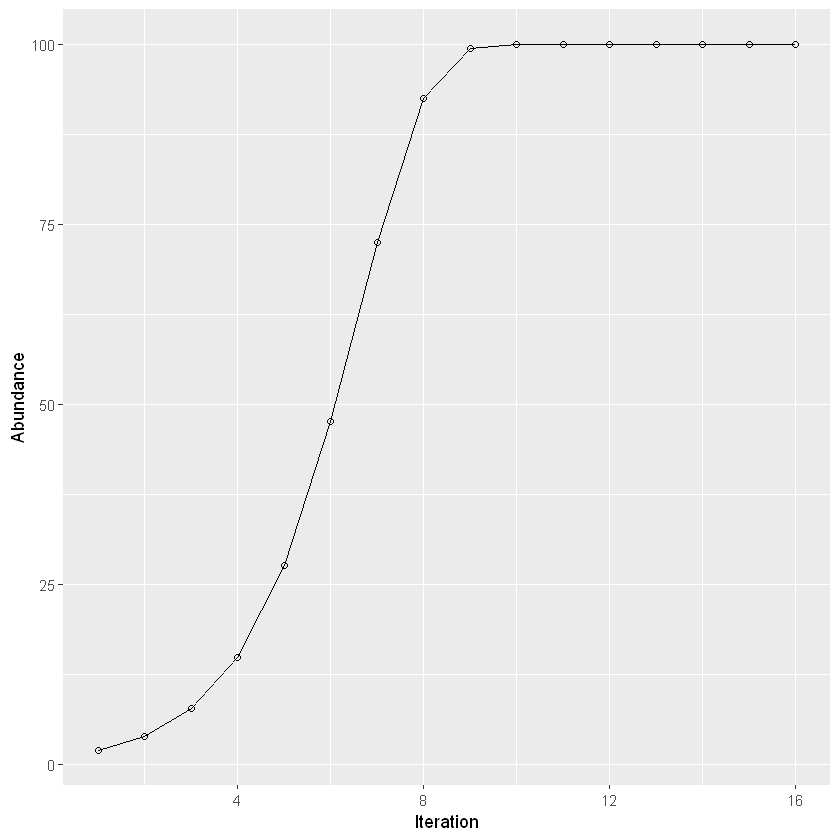

In [28]:
Number = dlogistic()
time = c(1:16) 
logistic_frame <- data.frame (

    Abundance = Number, 
    Iteration = time 
    
)

ggplot(logistic_frame, aes(x=Iteration, y=Abundance)) + geom_line() + geom_point(pch=1)

In [39]:
dlogistic <- function (alpha = 0.01, rd, N0 = 2, t = 30) {

    N = vector()
    N[1] = N0 
    for ( i in 1:t) {

        N[i+1] = N[i] + N[i] * rd * (1-(N[i]*alpha))
        
    }
    return (N)
}

Number <- matrix(nrow = 3, ncol = 31)

Number [1,] = dlogistic (rd = 1) 
Number [2,] = dlogistic (rd = 0.3) 
Number [3,] = dlogistic (rd = 0.7) 

logistic_frame <- data.frame (

    Abundance_r_1 = Number [1,], 
    Abundance_r_0.3 = Number [2,],
    Abundance_r_0.7 = Number [3,],
    Iteration = c(1:31) 
    
)
logistic_frame

Abundance_r_1,Abundance_r_0.3,Abundance_r_0.7,Iteration
2.000000,2.000000,2.000000,1
3.960000,2.588000,3.372000,2
7.763184,3.344307,5.652807,3
14.923698,4.314046,9.386093,4
27.620228,5.552426,15.339667,5
47.611686,7.125666,24.430296,6
72.554646,9.111040,37.353627,7
92.467525,11.595319,53.734112,8
99.432618,14.670561,71.136507,9
99.996781,18.426053,85.509243,10


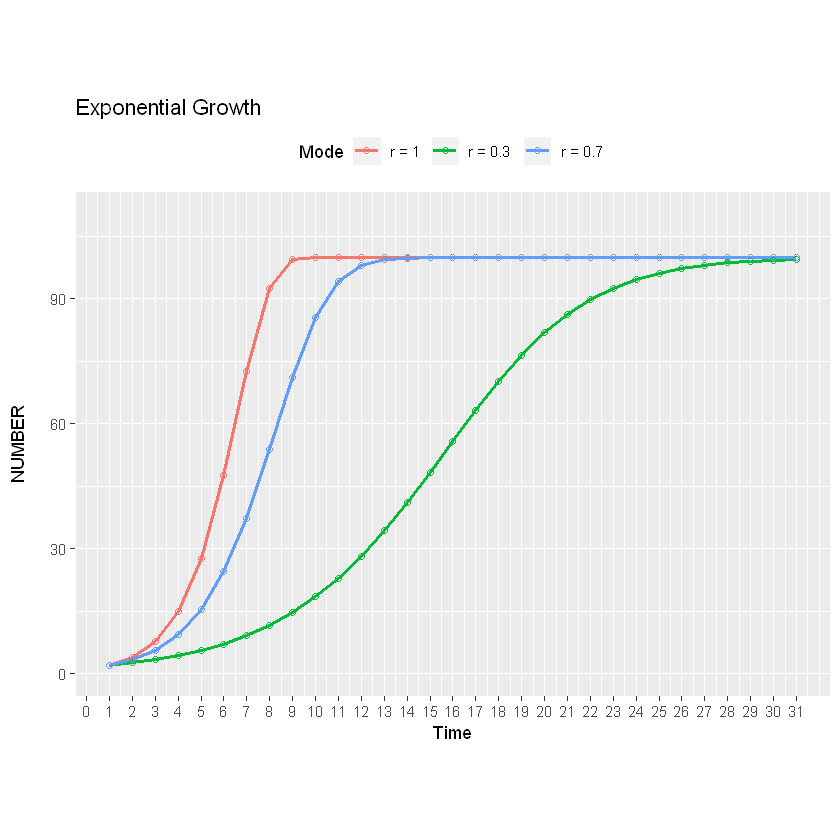

In [43]:
    Fig11 <- data.frame("Time" = c(1:31), "Number" =Number [1,], "Mode" = rep("r = 1", 31))
    Fig12 <- data.frame("Time" = c(1:31), "Number" = Number [2,], "Mode" = rep("r = 0.3", 31))
    Fig13 <- data.frame("Time" = c(1:31), "Number" = Number [3,], "Mode" = rep("r = 0.7", 31))
    
    Fig1 <- rbind(Fig11, Fig12, Fig13)
  
  ggplot(Fig1, aes(x=Time, y=Number, color=Mode)) +
    geom_line(size=1) +
    scale_x_continuous(name="Time",  limits =c(1, 31), breaks=seq(0, 31, 1)) + 
    scale_y_continuous(name="NUMBER\n", limits = c(0, 110)) +
    theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
    ggtitle(label = 'Exponential Growth') + geom_point(pch=1) 

Change,Number
1.960000e+00,2.000000
3.803184e+00,3.960000
7.160514e+00,7.763184
1.269653e+01,14.923698
1.999146e+01,27.620228
2.494296e+01,47.611686
1.991288e+01,72.554646
6.965093e+00,92.467525
5.641625e-01,99.432618
3.219117e-03,99.996781


Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

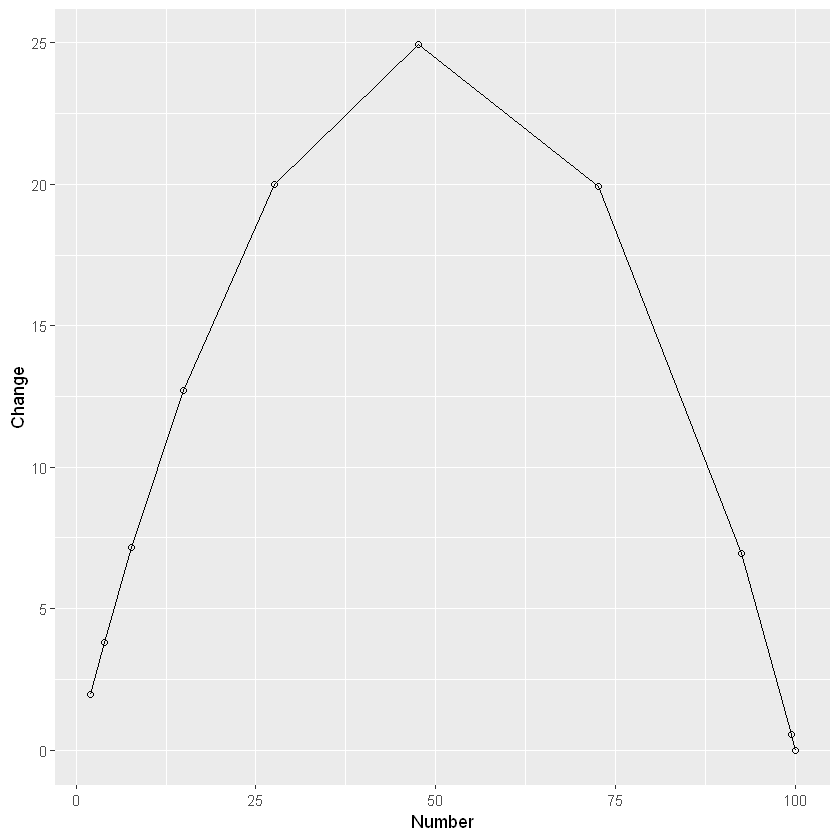

In [283]:
dlogistic <- function (alpha = 0.01, rd = 1, N0 = 2, t = 15) {

    N = vector()
    N[1] = N0 
    for ( i in 1:t) {

        N[i+1] = N[i] + N[i] * rd * (1-(N[i]*alpha))
        
    }
    return (N)
}

Number = dlogistic()
time = c(1:16) 
logistic_frame <- data.frame (

    Count = Number, 
    Iteration = time 
    
)
ratio = vector() 
ratio[1] = 1 
total.incr <- logistic_frame[["Count"]][1:length(logistic_frame[["Count"]]) +1 ] -logistic_frame[["Count"]][1:length(logistic_frame[["Count"]]) ]
per.capita.incr <- total.incr/logistic_frame[["Count"]][1:length(logistic_frame[["Count"]]) ]


ratio_frame = data.frame (

    Change = total.incr ,
    Number = logistic_frame[["Count"]]
    
)
ratio_frame
ggplot(ratio_frame, aes(x=Number, y=Change)) +  geom_point(pch=1) + geom_line()

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

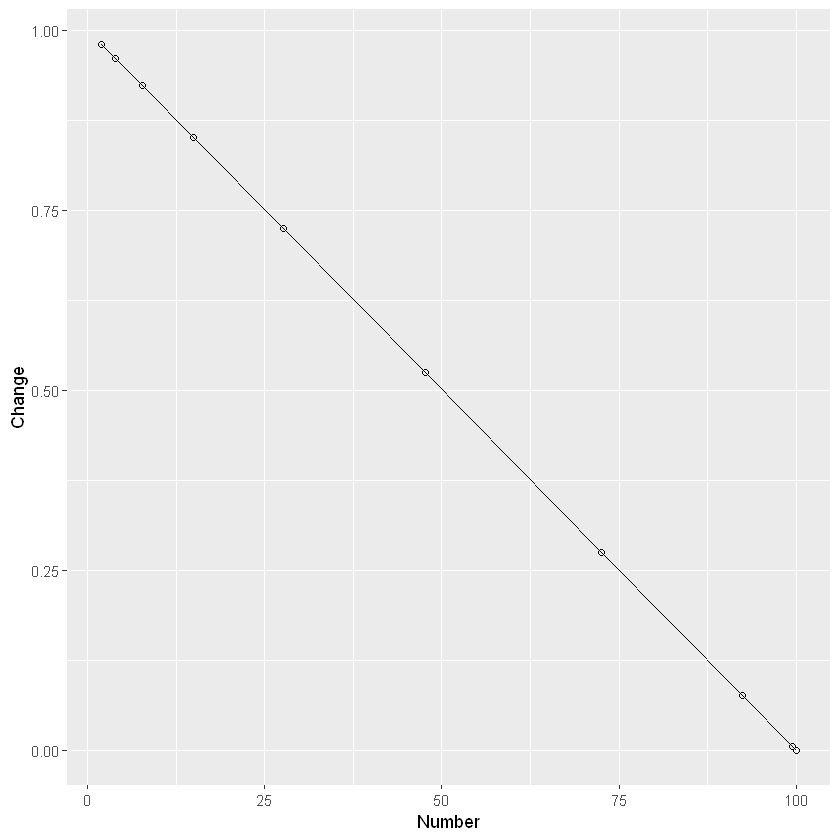

In [51]:
ratio_frame = data.frame (

    Change = total.incr ,
    Number = logistic_frame[["Count"]]
    
)

ggplot(ratio_frame, aes(x=Number, y=Change)) +  geom_point(pch=1) + geom_line()

## Growth in Populations with Discrete Generations: a second model

In a density dependent population we expect growth to slow and eventually stop as a population increases, and reaches the carrying capacity. For populations with discrete generations, we can begin with equation $N_t = N_0 R^t $.

To incorporate intraspecific competition into a model, we simply modify the growth rate factor, $R$. One approach is to graph the reciprocal of increase per generation $N_{t} / N_{t+1}$ versus $N_t$. If a population is very small (virtually zero), the population is assumed to grow at the maximal rate, $R$. 

Rearranging equation we have $N_t/N_{t+1} = 1/R$. Point A is therefore (0, 1/$R$). The carrying capacity, K, occurs when $N_t/N_{t+1} = 1$. That is, when there is no population change from one generation to the next. Point B, then, is (K, 1). If we assume that population growth per generation
follows a straight line between points A and B, we have that the y-intercept is 1/$R$ and the slope is therefore 
$$
\frac {1-(1/R)} {K}
$$
The general linear equation, $y = a + mx$ becomes
$$
    N_t/N_{t+1} = 1/R + {\frac{1-(1/R)}{K}}N_t
$$
Rearranging and providing the common denominator $RK$
$$
    N_t/N_{t+1} = \frac {K + (1-\frac {1}{R} (N_tR)}{RK} = \frac {(R_1)(N_t)+K}{RK}
$$

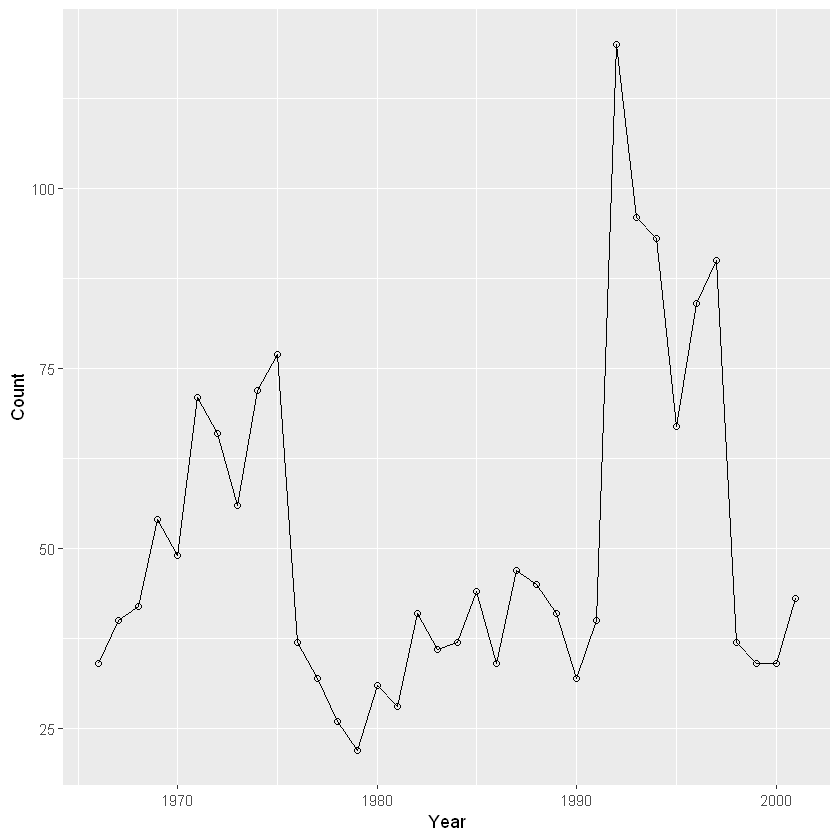

In [52]:
sparrows <- data.frame (

    Year = c(1966:2001), 
    Count = c( 34, 40, 42, 54, 49, 71, 66, 56, 72, 77, 37, 32, 26, 22, 31, 28, 41, 36, 37, 44, 34, 47, 45, 41, 32, 40, 120, 96, 93, 67, 84, 90, 37, 34, 34, 43) 
    
)
ggplot(sparrows, aes(x=Year, y=Count)) + geom_line() + geom_point(pch=1)

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

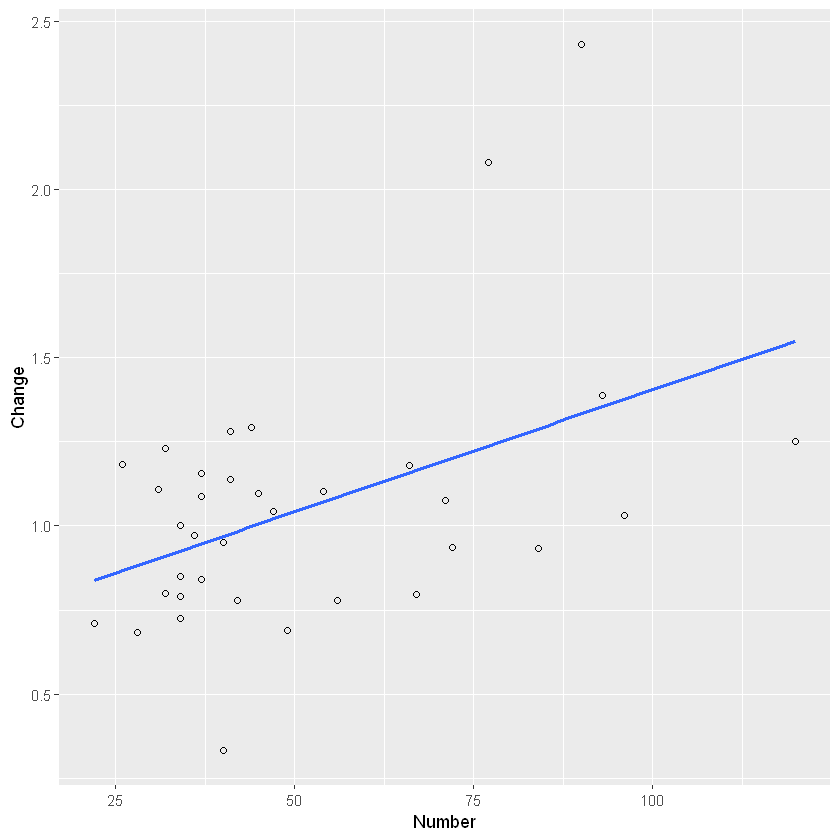

In [75]:
ratio = vector() 
ratio[1] = 1 
total.incr <- sparrows[["Count"]][1:length(sparrows[["Count"]]) ] / sparrows[["Count"]][1:length(sparrows[["Count"]]) +1 ]



ratio_frame = data.frame (

    Change = total.incr,
    Number = sparrows[["Count"]]
    
)

ggplot(ratio_frame, aes(x=Number, y=Change)) +  geom_point(pch=1) + geom_smooth(method = 'lm', se = FALSE)

In [76]:
lm.r <- lm(formula = Change ~ Number,
         data = ratio_frame)
summary(lm.r)


Call:
lm(formula = Change ~ Number, data = ratio_frame)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63536 -0.20358 -0.01631  0.15213  1.10069 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.678245   0.138791   4.887 2.57e-05 ***
Number      0.007261   0.002472   2.938  0.00599 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3399 on 33 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2073,	Adjusted R-squared:  0.1833 
F-statistic: 8.629 on 1 and 33 DF,  p-value: 0.005991


In [77]:
names(lm.r[['coefficients']])

[1] "(Intercept)" "Number"

In [78]:
# finding K for disecrete growth 
K = (1 - lm.r[['coefficients']] [['(Intercept)']] ) / lm.r[['coefficients']] [['Number']] 
K

[1] 44.31212

In [80]:
# finding R for disecrete growth  
R =  1 / lm.r[['coefficients']] [['(Intercept)']] 
R

[1] 1.474394

In [88]:
t = 30 
N = vector ()
N[1] = 5
for ( i in 1:t) {

    N[i+1] = (N[i] * R * K)/((N[i]) * (R-1) + K)
    
}

N_frame <- data.frame (

    Generation = c(1:31),
    Number = N
    
)

N_frame

Generation,Number
1,5.000000
2,6.997409
3,9.597935
4,12.832556
5,16.634908
6,20.818811
7,25.100675
8,29.169753
9,32.773180
10,35.770207


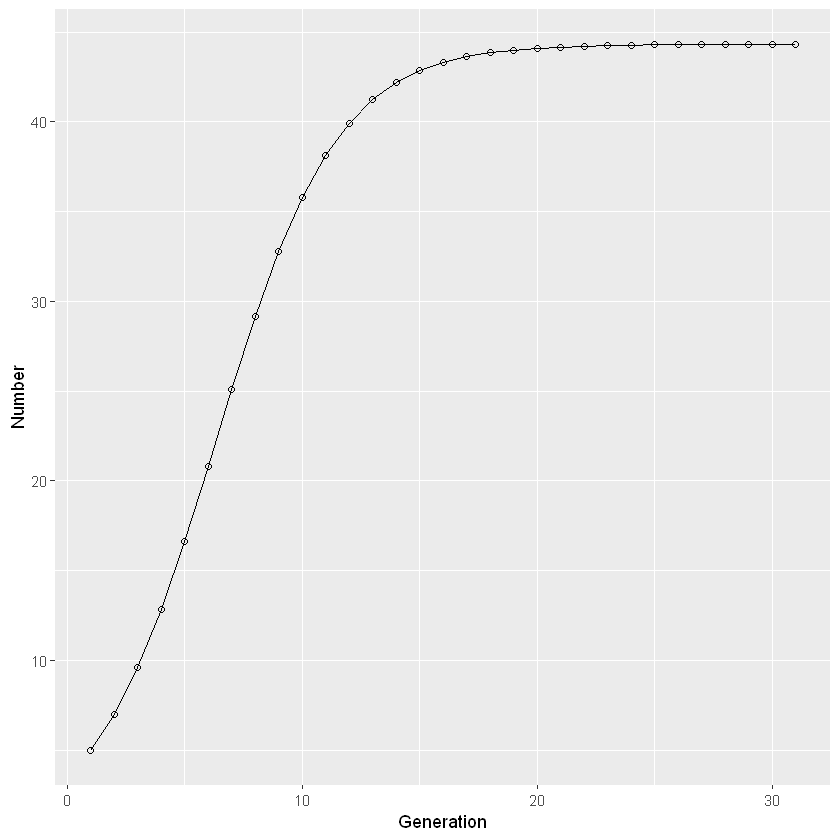

In [89]:
ggplot(N_frame, aes(x=Generation, y=Number)) +  geom_point(pch=1) + geom_line()

## Growth in Populations with Discrete Generations: another model

The simplest way is to assume that the multiplication rate changes as population density rises and falls. At high densities, birth rates will decrease or death rates will increase from a variety of causes, such as food shortage or epidemic disease. At low densities birth rates will be high and losses from diseases and natural enemies low. We need to express the way in which the multiplication rate slows down as density increases. The simplest mathematical model is linear: Assume that there is a straight-line relationship between the density and multiplication rates such that the higher the density, the lower the multiplication rate. The point where the line crosses $R_0 = 1.0$ is a point of equilibrium in population density at which the birth rate equals the death rate. It is convenient to measure population density in terms of deviations from this equilibrium density, expressed as
$$
    z = N - N_{eq} 
$$
where 
- $z$ = deviation from equilibrium density, 
- $N$ = observed population size
- $N_{eq}$ = equilibrium population size (where $R_0 = 1.0$). 

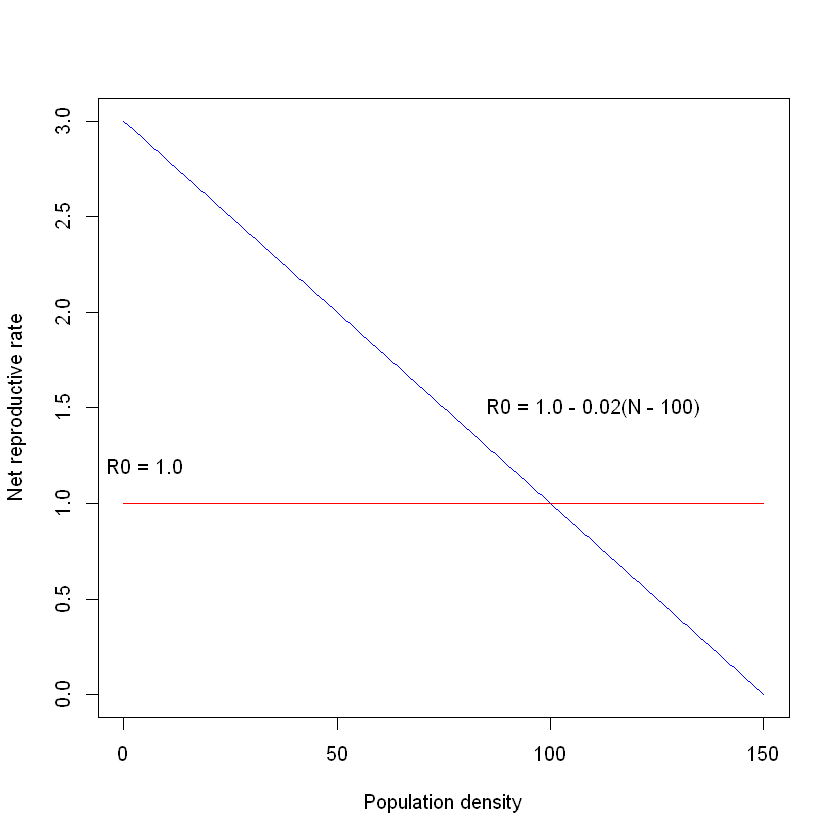

In [114]:
curve(x^0, from=0, to=150, , xlab="Population density", ylab="Net reproductive rate" , ylim = c(0, 3), col = 'red') 
lines(0:150, 1.0 - 0.02*((0:150) - 100), col = 'blue')
text (5, 1.2, 'R0 = 1.0')
text (110, 1.5, 'R0 = 1.0 - 0.02(N - 100)')

The equation of the straight line shown in Figure above is thus 
$$
    R_0 = 1.0 - B(N- N_{eq})
$$
where 
- $R_0$ = net reproductive rate or rate of population growth per generation
- $B$ = slope of line

$$
    N_{t+1} = N_t(R_0) = N_t (1-Bz_t)  
$$

In [118]:
B = 0.025
Neq = 100 
N0 = 50
N = vector() 
N[1] = N0 
t = 20 
for ( i in 1:t) {

    N[i+1] = (1-B*(N[i]-Neq)) * N[i] 
    
}

krebs_frame <- data.frame (

    Generation = c(1:21), 
    Number = N
    
)

krebs_frame

Generation,Number
1,50.00000
2,112.50000
3,77.34375
4,121.15173
5,57.08750
6,118.33169
7,64.10120
8,121.63010
9,55.85831
10,117.50031


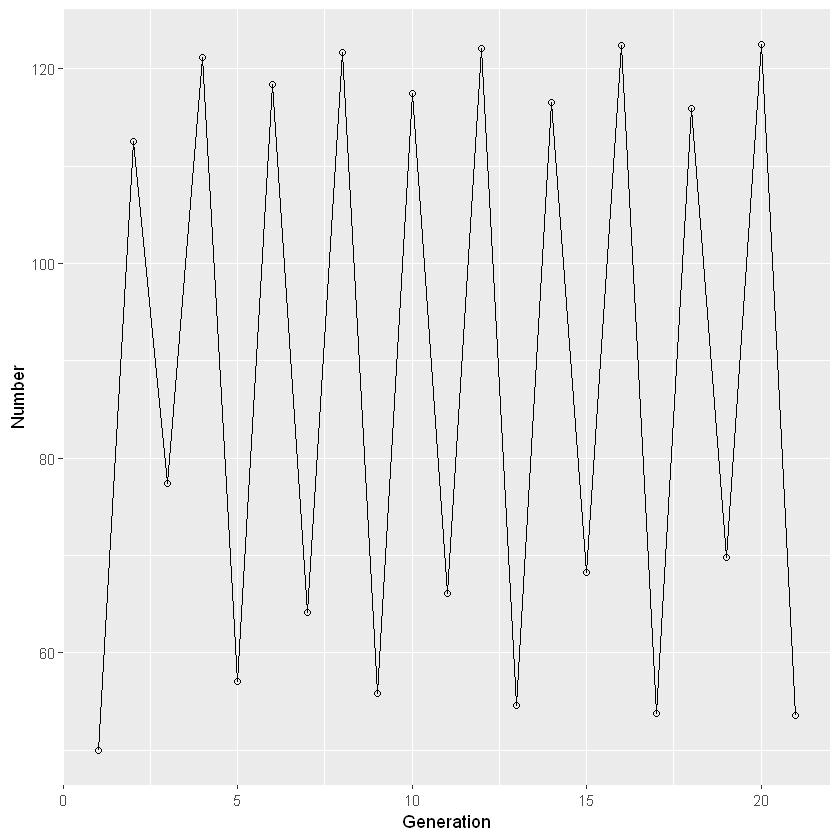

In [119]:
ggplot(krebs_frame, aes(x=Generation, y=Number)) +  geom_point(pch=1) + geom_line()

The classic version of continuous density dependent growth is the continuous logistic growth equation, the continuous version of eq.
$$
     N_{t+1} = N_t + N_t r_d (1-\frac {N_t} {K})
$$
which will become
$$
    \frac {dN}{dt} = rN(1-\frac{N}{K})
$$
By now you might be wondering why we are studying such simplistic models that make such unrealistic assumptions. Let’s use the next couple of pages to figure out how we might relax some of these assumptions, and generalize it. 

First let’s realize that the density independent per capita growth rate, r, is really a net rate — it is the difference between the density independent, instantaneous birth and death rates, b and d. If we start with per capita logistic growth, the generalization would look like this.
$$
 \frac {dN}{Ndt} = r(1-\alpha N)
$$
$$
    = (b-d) (1-\alpha N)
$$
$$
    = b - d - b\alpha N + d\alpha N
$$
where $b-d = r$ 
Note that the positive, density-independent effect on growth rate of $b$ is counterbalanced a bit by a negative density-dependent effect of $b$. As $N$ increases, increasing births tend to rein in growth rate a bit, because more births mean a larger negative density-dependent effect. Similarly, mortality, $d$ includes a small positive density-dependent effect that helps enhance growth rate because it reduces the negative effect of $αN$ — death frees up resources.

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

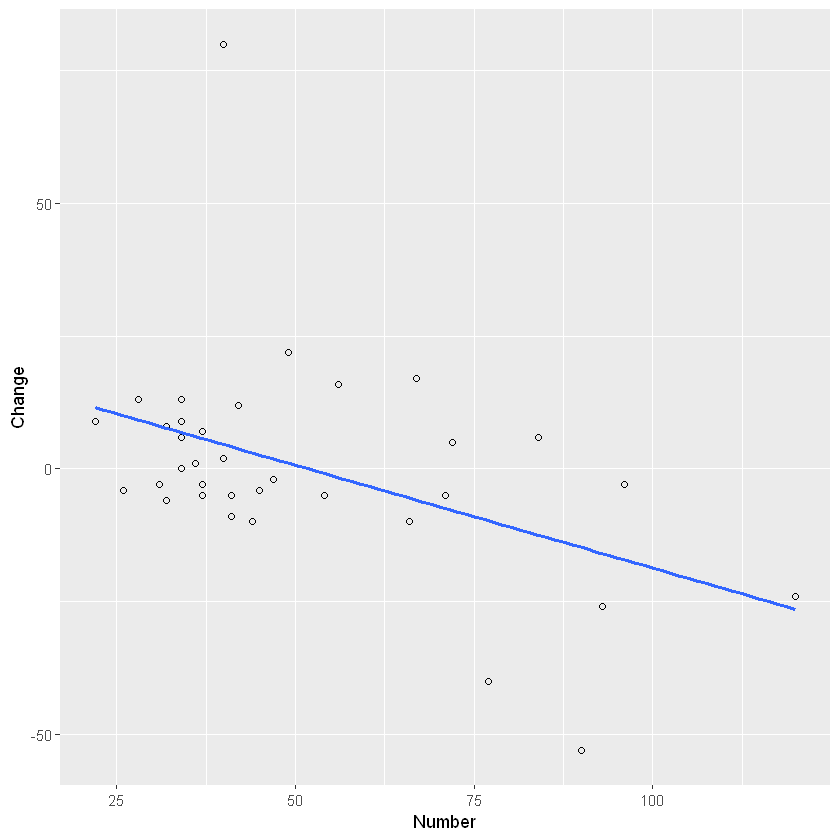

In [120]:
ratio = vector() 
ratio[1] = 1 
total.incr <- sparrows[["Count"]][1:length(sparrows[["Count"]]) +1 ] -sparrows[["Count"]][1:length(sparrows[["Count"]]) ]
per.capita.incr <- total.incr/sparrows[["Count"]][1:length(sparrows[["Count"]]) ]


ratio_frame = data.frame (

    Change = total.incr,
    Number = sparrows[["Count"]]
    
)

ggplot(ratio_frame, aes(x=Number, y=Change)) +  geom_point(pch=1) + geom_smooth(method = 'lm', se = FALSE)

In [121]:
lm.r <- lm(formula = Change ~ Number,
         data = ratio_frame)
summary(lm.r)


Call:
lm(formula = Change ~ Number, data = ratio_frame)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.185  -9.600  -2.565   4.946  75.435 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  20.0697     7.6519   2.623  0.01310 * 
Number       -0.3876     0.1363  -2.844  0.00759 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.74 on 33 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1969,	Adjusted R-squared:  0.1726 
F-statistic:  8.09 on 1 and 33 DF,  p-value: 0.007585


In [122]:
names(lm.r[['coefficients']])

[1] "(Intercept)" "Number"

In [123]:
# finding K for countinious generation 
K = ( - lm.r[['coefficients']] [['(Intercept)']] ) / lm.r[['coefficients']] [['Number']] 
K

[1] 51.77769

In [125]:
# finding R for disecrete growth  
r =  lm.r[['coefficients']] [['(Intercept)']] 
r

[1] 20.06969

In [136]:
t = 30 
N = vector ()
N[1] = 5
for ( i in 1:t) {

    N[i+1] = N[i] + r*N[i]*(1-(N[i]/K))
    if(N[i+1] < 0) {

        N[i+1] = 0
        
    }
    
}

N_frame <- data.frame (

    Generation = c(1:31),
    Number = N
    
)

N_frame

Generation,Number
1,5.00000
2,95.65813
3,0.00000
4,0.00000
5,0.00000
6,0.00000
7,0.00000
8,0.00000
9,0.00000
10,0.00000


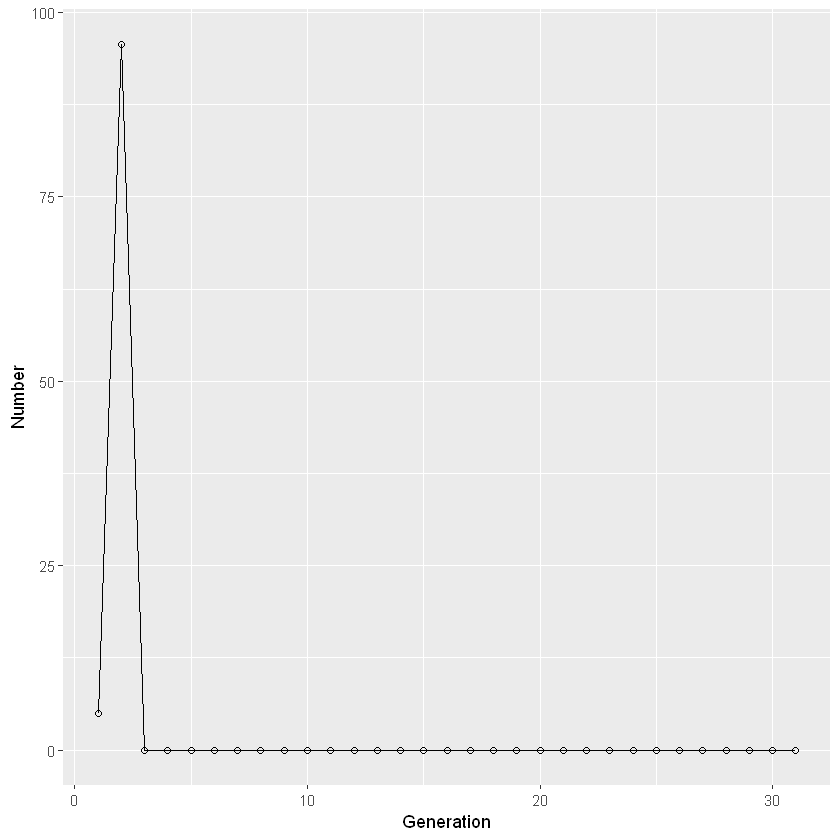

In [137]:
ggplot(N_frame, aes(x=Generation, y=Number)) +  geom_point(pch=1) + geom_line()

Density dependence is the effect of density on growth rate, and thus far we have let that be $1 − αN$.  Let’s represent this as the function $F (N) = 1 − αN$. We can now note that α is also a net effect — $N$ will have separate effects on the birth and death rates, and α could be just the sum of more arbitrary constants (e.g., $αN = (x + y)N$); $1 − αN$ is merely the simplest form of $F (N)$. We can generalize further and let density affect the birth and death rates separately,
$$
    \frac {dN}{Ndt} = rNF(N)
$$
$$
    F(N) = B(N) - D(N) 
$$

We might anticipate that density has no effect on death rates when $N$ is low, because there is no particular limiting factor. Paradoxically, however, when $N$ becomes large, the ensuing mortality benefits growth rate a bit because death frees up limiting resources. Such an idea might have the simple form
$$
    D(N) = gN^2
$$
where $g$ is a constant. This function starts out at zero (no effect) and increases rapidly. This means that at low density, mortality does not influence growth rate, whereas at high density, mortality enhances growth rate.
The density dependence for birth rates could also be more complicated. The Allee effect arises when a population gets very small and mating success
declines because mates can’t find each other, leading to a large negative per capita impact of $N$. We can describe this with a quadratic function,
$$
    B(N) = -\alpha N^2 + eN - f
$$
where $a$, $e$, and $f$ are constants. Here, the negative effect of $N$ on birth rates, $B(N)$, will be important at low $N$ because when $N = 0$, $B(N) = −f$ . The negative effect will also be large at very high $N$ because $−aN2$ becomes a large negative number at large $N$. The point here is that we can alter density dependence to incorporate specific biology.

In [141]:
B.N <- expression(-a * N^2 + e * N - f) 
D.N <- expression(g * N^2)

 a <- 1/1600; e <- 80 * a; f <- 0.2; g <- 4e-05; N <- 0:100

Allee_effect <- data.frame (

    Abundance = N,
    Birth_rate = eval(B.N),
    Death_rate = eval(D.N),
    Density_dependance = eval(B.N) + eval(D.N)
    
)

Allee_effect

Abundance,Birth_rate,Death_rate,Density_dependance
0,-0.200000,0.00000,-0.200000
1,-0.150625,0.00004,-0.150585
2,-0.102500,0.00016,-0.102340
3,-0.055625,0.00036,-0.055265
4,-0.010000,0.00064,-0.009360
5,0.034375,0.00100,0.035375
6,0.077500,0.00144,0.078940
7,0.119375,0.00196,0.121335
8,0.160000,0.00256,0.162560
9,0.199375,0.00324,0.202615


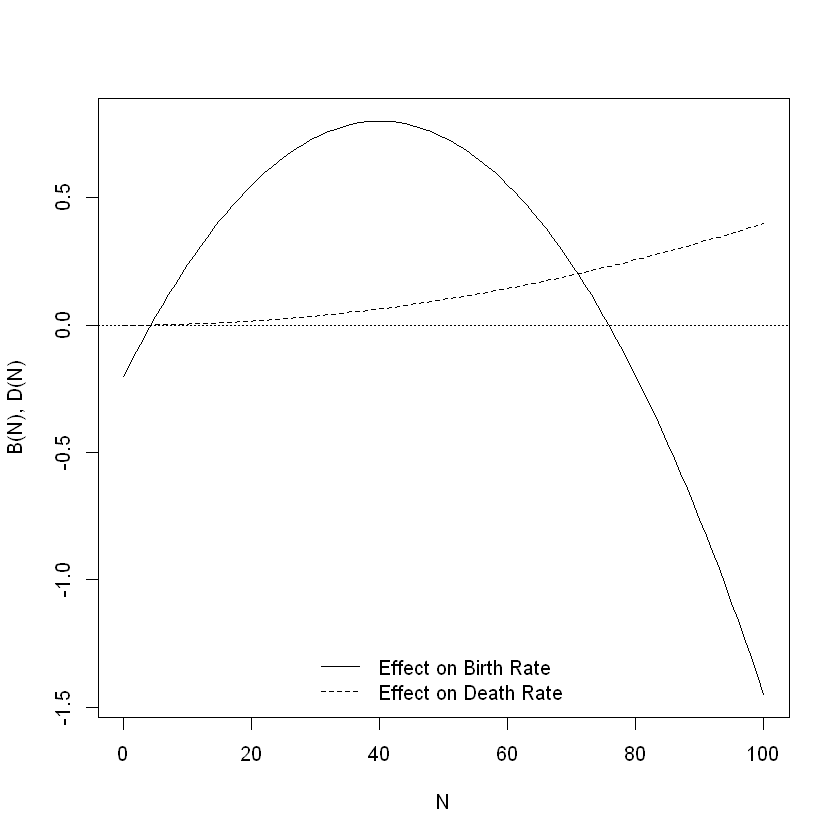

In [142]:
plot(N, eval(B.N), type = "l", ylab = "B(N), D(N)")
lines(N, eval(D.N), lty = 2)
abline(h = 0, lty = 3)
legend("bottom", c("Effect on Birth Rate", "Effect on Death Rate"), lty = 1:2, bty = "n")

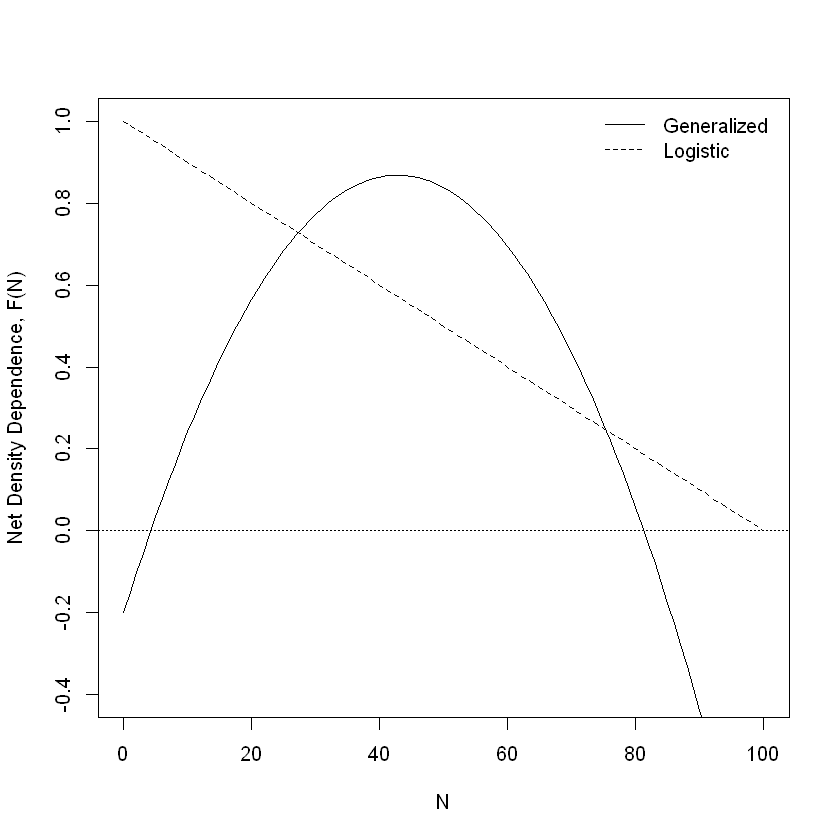

In [143]:
plot(N, eval(B.N) + eval(D.N), type = "l", ylim = c(-0.4, 1), ylab = "Net Density Dependence, F(N)")
abline(h = 0, lty = 3)
curve(1 - 0.01 * x, 0, 100, lty = 2, add = T)
legend("topright", c("Generalized", "Logistic"), lty = 1:2, bty = "n") 

In [157]:
# Define the expressions
B_N <- expression(-a * N^2 + e * N - f)
D_N <- expression(g * N^2)
 a< - 1/1600; e <- 80 * a; f <- 0.2; g <- 4e-05
# Convert expressions to functions
f_BN <- function(N) eval(B_N, envir = list(N = N))
f_DN <- function(N) eval(D_N, envir = list(N = N))

# Define the function to find the root of f_BN(N) - f_DN(N)
root_function <- function(N) f_BN(N) - f_DN(N)

# Use uniroot to find the value of N where B.N = D.N
result <- uniroot(root_function, interval = c(0, 20))  # Example values for a, e, f, g

# Print the result
print(result$root)


[1] FALSE

[1] 4.238988


In [158]:
# Define the expressions
B_N <- expression(-a * N^2 + e * N - f)
D_N <- expression(g * N^2)
 a< - 1/1600; e <- 80 * a; f <- 0.2; g <- 4e-05
# Convert expressions to functions
f_BN <- function(N) eval(B_N, envir = list(N = N))
f_DN <- function(N) eval(D_N, envir = list(N = N))

# Define the function to find the root of f_BN(N) - f_DN(N)
root_function <- function(N) f_BN(N) - f_DN(N)

# Use uniroot to find the value of N where B.N = D.N
result <- uniroot(root_function, interval = c(50, 80))  # Example values for a, e, f, g

# Print the result
print(result$root)


[1] FALSE

[1] 70.94901


#### Projection with numerical integration

In simple density-independent growth, we were able to project a population using the integral of the exponential growth equation, $N_t = N_0 e^{rt}$. As our models become more and more complex, we are no longer able to to do that. Instead, we use numerical integration to project models of continuous growth through time. We use numerical techniques that turn the infinitely small intervals of calculus ($dy$, $dx$) into very, very small, but finite steps. Mathematicians and computer scientists have devised very clever ways of doing this very accurately and precisely. 
When we have an ordinary differential equation (ODE) such as logistic growth, $dN / dt = rN(1-\alpha N)$ we say that we “solve” the equation, 
- over a particular time interval
- given a set of parameters and
- with particular initial conditions or initial population size.

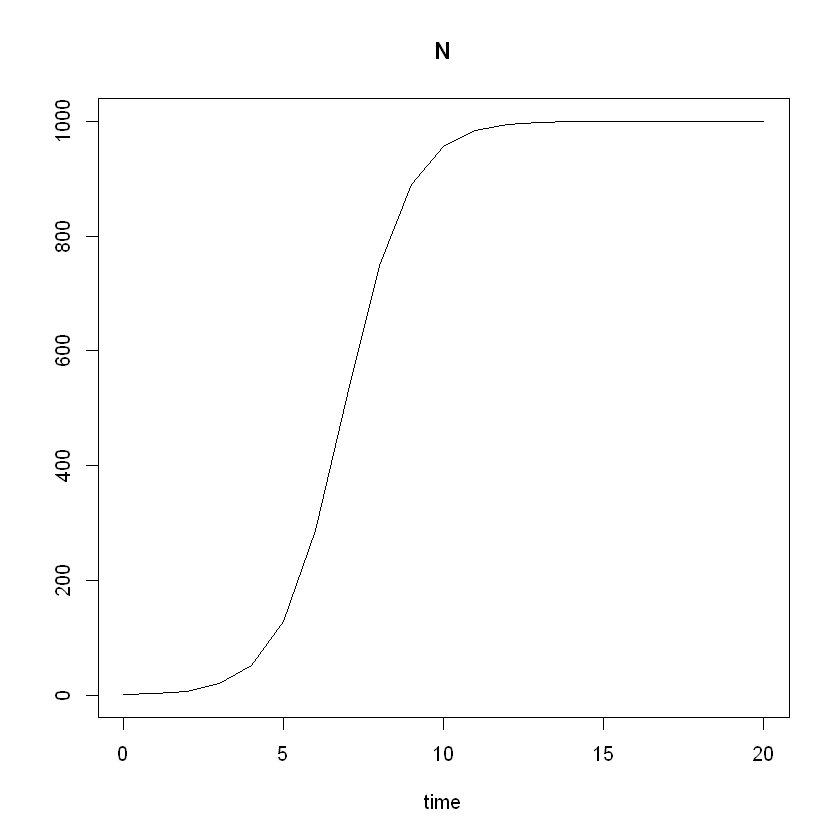

In [165]:
library ('deSolve')

logistic <- function(t, y, p){
    dN.dt <- p[1] * y[1] * (1 - p[2] * y[1])
    return( list( dN.dt ) )
   }   

p <- c(r=1, alpha = 0.001)

# We name the state variable and the parameters
y0 <- c(N=1)
t <- 0:20

out <- ode(y=y0, times=t, func=logistic, parms=p)

plot(out)

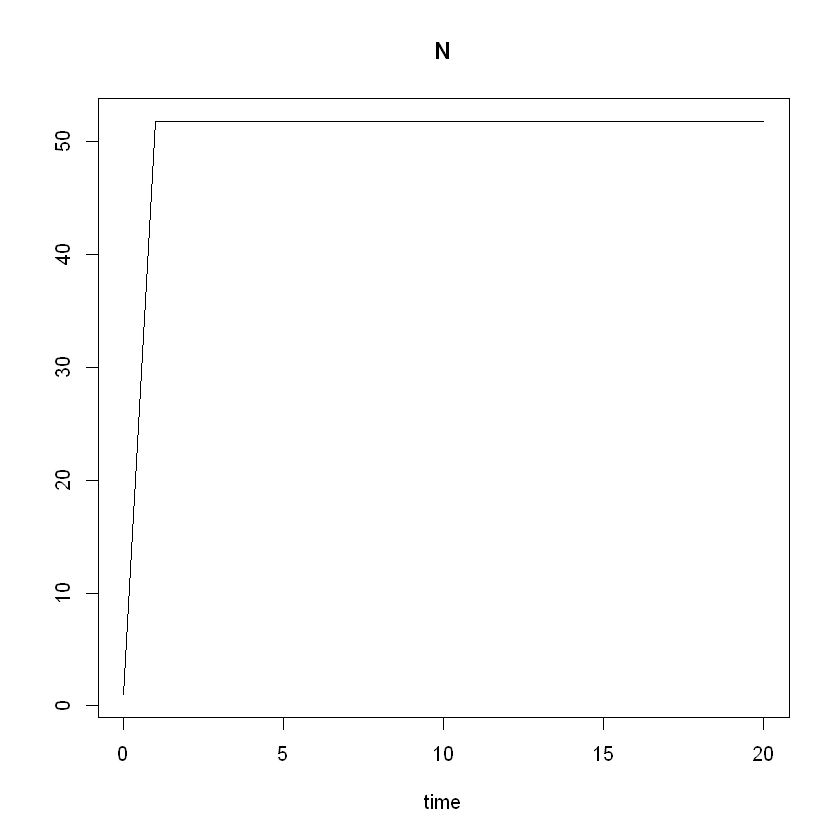

In [167]:
p <- c(r=20.0696893125826, alpha = 1/51.7776872360916)

# We name the state variable and the parameters
y0 <- c(N=1)
t <- 0:20

out <- ode(y=y0, times=t, func=logistic, parms=p)

plot(out)

[1] FALSE

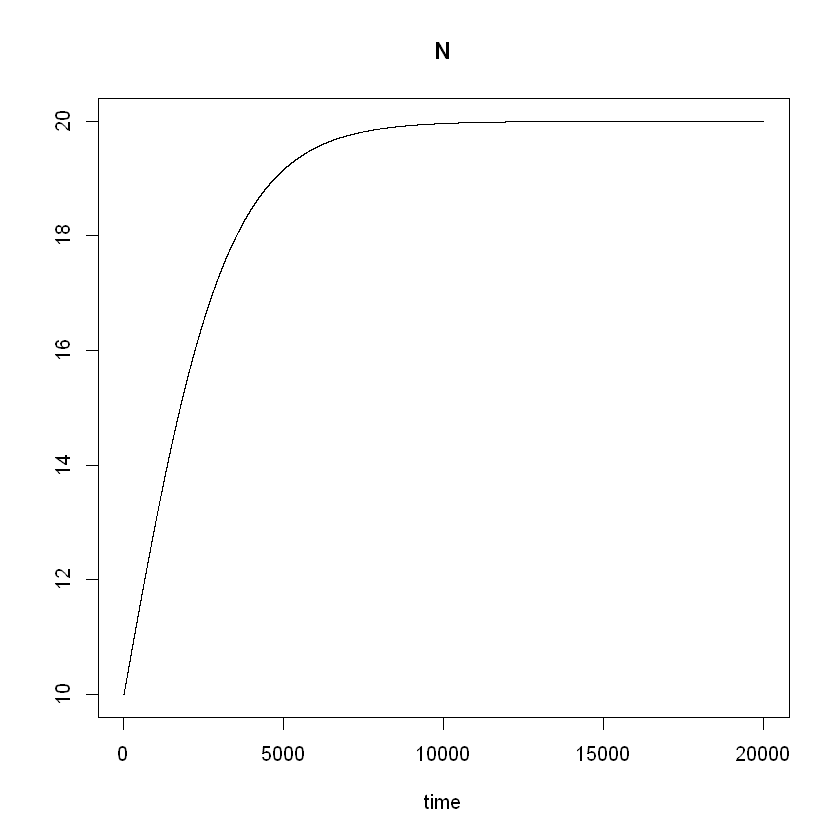

In [171]:
logistic2 <- function(t, y, p){
    dN.dt <- ((-p[1] * y[1]^2 + p[2] * y[1] - p[3]) - (p[4] * y[1]^2)) * y[1] 
    eturn( list( dN.dt ) )
   }   

a< - 1/1600; e <- 80 * a; f <- 0.2; g <- 4e-05
p <- c(a, e, f, g)

# We name the state variable and the parameters
y0 <- c(N=10)
t <- 0:20000
out <- ode(y=y0, times=t, func=logistic, parms=p)

plot(out)

[1] FALSE

Warning message:
"Removed 2 rows containing missing values (geom_path)."

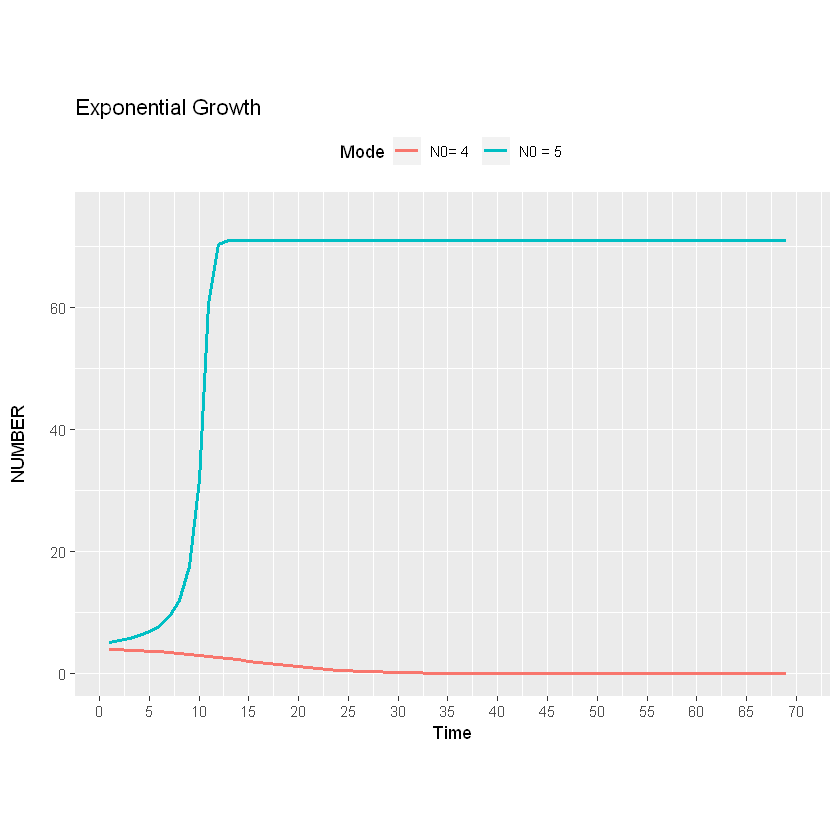

In [190]:
logistic2 <- function(t, y, p){
    dN.dt <- ((-p[1] * y[1]^2 + p[2] * y[1] - p[3]) - (p[4] * y[1]^2)) * y[1] 
    return( list( dN.dt ) )
   }   

a< - 1/1600; e <- 80 * a; f <- 0.2; g <- 4e-05
p <- c(a, e, f, g)

# We name the state variable and the parameters
y0 <- c(N=4)
y1 <- c(N=5)
t <- 0:69
out1 <- ode(y=y0, times=t, func=logistic2, parms=p)
out2 <-  ode(y=y1, times=t, func=logistic2, parms=p)

    Fig11 <- data.frame("Time" = t, "Number" =out1[,2], "Mode" = rep("N0= 4", 70))
    Fig12 <- data.frame("Time" = t, "Number" = out2[,2], "Mode" = rep("N0 = 5", 70))

    
    Fig1 <- rbind(Fig11, Fig12)
  
  ggplot(Fig1, aes(x=Time, y=Number, color=Mode)) +
    geom_line(size=1) +
    scale_x_continuous(name="Time",  limits =c(1, 70), breaks=seq(0, 70, 5)) + 
    scale_y_continuous(name="NUMBER\n", limits = c(0, 75)) +
    theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
    ggtitle(label = 'Exponential Growth') 

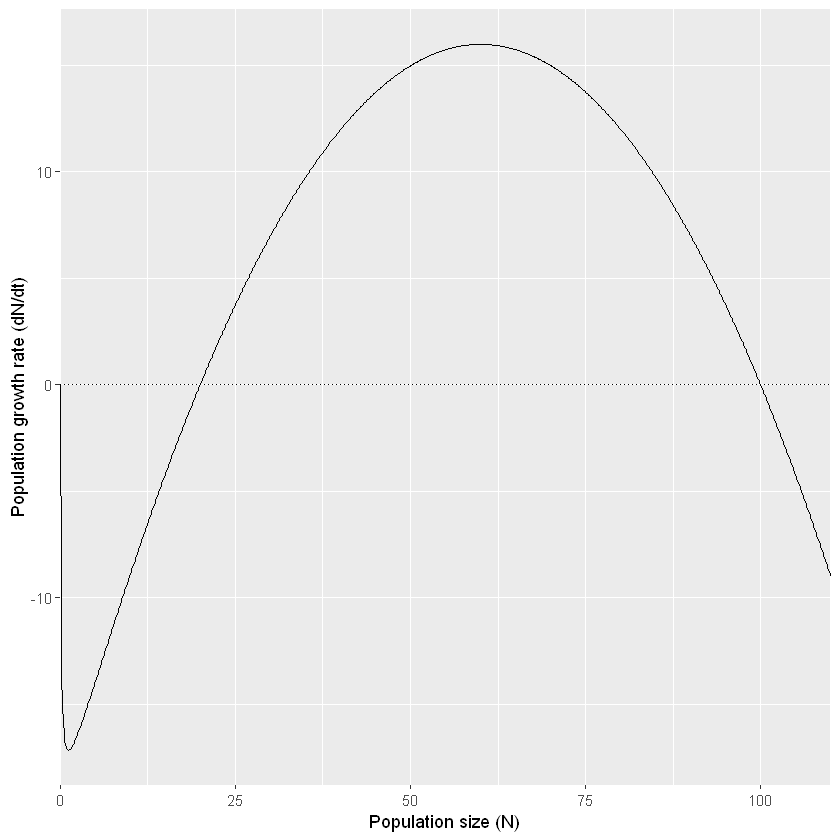

In [285]:
pgrA <- function(N, alpha, a, tau){ N*(1-alpha*N)*(1-(a+tau)/(N+tau)) }
myData <- data.frame( N=c(0, 110) ) # ggplot requires a data frame
p <- ggplot(data=myData, aes(x=N)) + # set the basic properties of the plot
  # in the stat_function, we indicate the parameters in our equation.
    stat_function(fun=pgrA, geom="line", n=1001,
                  args=list(alpha = 0.01, a=20, tau=.1)) + 
  labs(y="Population growth rate (dN/dt)", x="Population size (N)") + 
  #theme_classic() + 
  geom_hline(yintercept=0, lty=3)+
  scale_x_continuous(expand = c(0, 0)) 
p

### Effects of N on birth and death rates

There are many mathematical forms of density-dependent growth, some of which will we describe below. Let’s start by decoupling the density-dependence of birth and death rates in logistic growth (N. J. Gotelli 2001).

Recall from chapter density-independent growth that $ r = b-d$ Now we will let $b$ and $d$ be functions of population size $N$ ($b = f(N)$, $ d= g(N)$). We could let $f(N)$ and $g(N)$  take a wide variety of different forms. For now, however, let’s say that $N$ has linear effects on these rates so that 
$$
    b = b_0 - aN 
$$
$$
    d = d_0 + cN
$$

With this addition we convert exponential population growth nto a form where both birth rate and death rate depend on density, but in independent ways:
$$
    \frac {dN}{Ndt} = (b_0 - a N )-(d_0 + cN) 
$$
$$
     =(b_0 - d_0) - (a + c)N 
$$
$$
    = (b_0 - d_0) * (1- \frac {a+c} {b_0 - d_0 } N)
$$

If we chose to, we can now say that the net negative effect of  $N$ n per capita population growth rate is
$$
    \alpha = \frac {a+c}{b_0 - d_0}
$$
where the numerator is the total direct negative effect of $N$ on birth and death rates, and the denominator is $r$ the net maximum per capita growth rate which occurs as $N$ approaches zero. 

### Sexual Vs. Asexual

Here, we assume that resources limit the population size, instead of space.

Under standart terminology, let b be the number of offspring produced by females in absence of any intraspecific competition. Let d be the death rate following reproduction. Now, let a represent the sensivity of birth rate to density, so that the actual Birth rate, B, is equal to: b-aN, where N is the number of hosts competing for resources in the relevant patch. Similarly, let c represent the sensivity of death rate to density, so that the actual Death rate, D is equal to: d-cN. Note that D is constrained to be less than or equal to one.

The recursion equation for the number of individuals at time *t + 1*, as a function of Nt is:
$$
  N_{t+1} = N_{t} + BN_{t} - DN_{t} 
$$
The change in population size is calculated as: 
$$ 
 N_{t+1} - N_{t} = BN_{t} - DN_{t}
$$
The equilibrium density, Kasex, is thus attained when B=D. Hence as reviewed by Gotelli (1995), the carrying capacity is 
$$
  K_{asex} = \frac {b-d} {a+c}
$$
Using this value for Kasex, eqn 1 can be converted into the more familiar form of the discrete-time logistic equation:
$$
  N_{t+1} = N_{t} + rN_{t} ( 1 - \frac {N_{t}} {K_{asex}}) 
$$

where *r = b–d*. This formulation assumes that all individuals are reproducing (e.g. asexual). For a dioecious (orgonochoric) population, however, males are not directly producing offspring. Hence the calculation for equilibrium in a sexual population is attained when *(1– s)B = D*, where s is the frequency of males in the population. It is easy to show that the carrying capacity for a sexual population, Ksex, is equal to:
$$
    K_{sex} = \frac {(1-s)b -d }{(1-s)a + c}
$$

In [191]:
# the simulation assumes that carrying capacity is set by the parameters below, rather than being fixed.

a = 0.0001  #a is a constant that gives the sensitivity to total population density
d = 1.0 # d is the death rate.  Here I set d=1, meaning an annual species.
b = 3.0 # b is the number of offspring prouduced by a single female (sexual or asexual)
c = 0  # c is a constant that gives the sensitivity of the death rate to density.  Here set = 0.
s = 1/2 # s is the frequency of males in the sexual subpopulation.  (1-s) gives the freq of females in sexual popl

# anayltical solutions: carrying capacities for sexual and asexuals are set by the parameters given above
Ksex = ((1-s)*b - d)/((1-s)*a + c) #solution for carrying capacity of sexual population
Kasex = (b - d)/(a + c) #solution for carrying capacity of asexual population

Ksex 
Kasex

[1] 10000

[1] 20000

In [195]:
# intitial conditions.  Sex initiated at Ksex.  Asex at 0.
Sex = Ksex 
Asex = 0

Gasex = 1000 #generation at which a single asexual female is introduced

T = 1200 # T is the number of time steps in addition to time step 0
time = c(1:T)  #sets up do loop for i = 1 to T

outSex = vector()  # outSex vector
outSex[1]=Sex[1]

outAsex = vector()  # outAsex  vector
outAsex[1]=Asex[1]

Ext_time = 0 

In [197]:
for(i in 1:T)

{
  outSex[i] = Sex[i]
  Sex[i+1] = Sex[i] - Sex[i]*(d + c*(Sex[i]+Asex[i])) + Sex[i]*(1-s)*(b - a*(Sex[i]+Asex[i]))
  if ( outSex[i] < 1){
      if (Ext_time == 0) {

          Ext_time = i
      }
  }
  if(i == Gasex)
    {
    Asex[i] = Asex[i] + 1
    }
  
  outAsex[i] = Asex[i]
  Asex[i+1] = Asex[i] - Asex[i]*d + Asex[i]*(b - a*(Sex[i]+Asex[i]))

}

Ext_time

[1] 1029

In [207]:
Male_cost <- data.frame (

    Generation = time[999:1040], 
    Sexual = outSex[999:1040],
    Asexual = outAsex[999:1040]
    
)
Male_cost

Generation,Sexual,Asexual
999,1.000000e+04,0.00000
1000,1.000000e+04,1.00000
1001,1.000000e+04,1.99990
1002,9.999000e+03,3.99940
1003,9.997500e+03,7.99760
1004,9.994752e+03,15.99080
1005,9.989383e+03,31.96443
1006,9.978721e+03,63.86062
1007,9.957475e+03,127.44931
1008,9.915194e+03,253.81627


Warning message:
"Removed 2248 rows containing missing values (geom_path)."Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

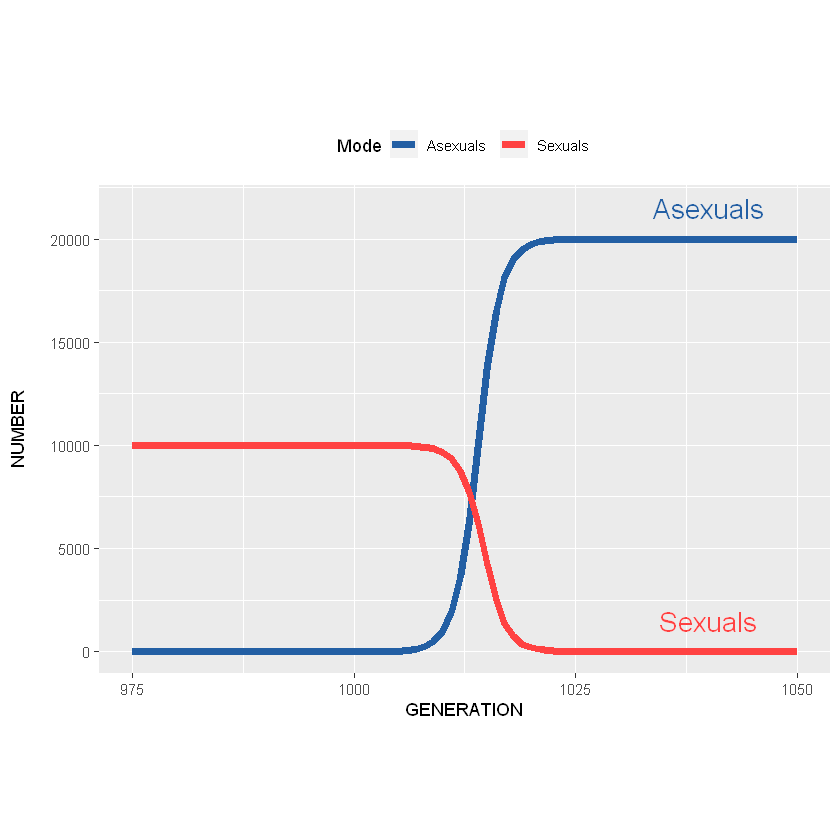

In [208]:
Fig12 <- data.frame("Generation" = time, "Number" = outAsex, "Mode" = rep("Asexuals", length(outAsex)))
Fig12s <- data.frame("Generation" = time, "Number" = outSex, "Mode" = rep("Sexuals", length(outSex)))
Fig12 <- rbind(Fig12, Fig12s)

ggplot(Fig12, aes(x=Generation, y=Number, color=Mode)) +
  geom_line(size=2) +
  scale_x_continuous(name="GENERATION",  limits =c(975, 1050), breaks=seq(975, 1050, 25)) + 
  scale_y_continuous(name="NUMBER\n", limits = c(0, 21500)) +
  scale_color_manual(values = c(Asexuals = "#235FA4", Sexuals = "#FF4242"))  +
  annotate(geom = "text", x= 1040, y = 21500, label = "Asexuals", color = "#235FA4", size = 6, family = "Routed Gothic") +
  annotate(geom = "text", x= 1040, y = 1500, label = "Sexuals", color = "#FF4242", size = 6, family = "Routed Gothic") +
  theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")

## Theta-logistic growth
The life history of a population frequently does not respond to increases in density in a linear fashion, as assumed by the logistic equation.Here we explore a simple extension of the logistic model, the theta-logistic model, which adds a parameter to increase flexibility and generality.
$$
    \frac {dN}{dt} = rN(1-(\frac {N}{K})^\theta)
$$
A little imagination lets us see that, at face value, 
- $\theta > 0$ implies growth and a stable equilibrium at $K$
- $\theta = 0$ means zero growth 

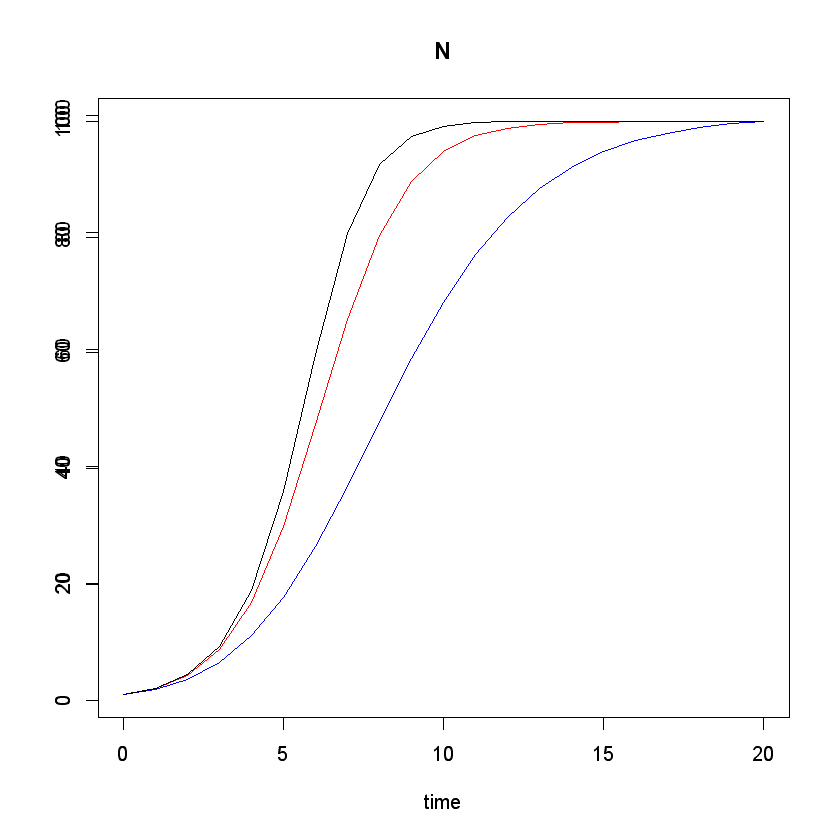

In [213]:
thetalogistic <- function(t, y, p){
    dN.dt <- p[1] * y[1] * (1 - (p[2] * y[1])^p[3])
    return( list( dN.dt ) )
   }   
r <- .75; alpha <- 0.01; theta <- 0.5; 
p <- c(r, alpha, theta)

# We name the state variable and the parameters
y0 <- c(N=1)
t <- 0:20
outtheta <- ode(y=y0, times=t, fun=thetalogistic, parms=p)

In [255]:
theta_frame <- data.frame (

    Theta_0.6 = ode(y=y0, times=t, fun=thetalogistic, parms=c(r, alpha, 0.5)),
    Theta_1 = ode(y=y0, times=t, fun=thetalogistic, parms=c(r, alpha, 1)),
    Theta_1.6 = ode(y=y0, times=t, fun=thetalogistic, parms=c(r, alpha, 1.5))
    
)
theta_frame


Theta_0.6.time,Theta_0.6.N,Theta_1.time,Theta_1.N,Theta_1.6.time,Theta_1.6.N
0,1.000000,0,1.000000,0,1.000000
1,1.936750,1,2.093617,1,2.114073
2,3.626315,2,4.330904,2,4.456517
3,6.501464,3,8.745424,3,9.313313
4,11.050780,4,16.866420,4,18.975470
5,17.651168,5,30.045689,5,36.138860
6,26.336434,6,47.623787,6,59.666725
7,36.643911,7,65.810834,7,80.686198
8,47.688376,8,80.295545,8,92.542167
9,58.453199,9,89.612352,9,97.417585


Warning message:
"Removed 3 rows containing missing values (geom_path)."

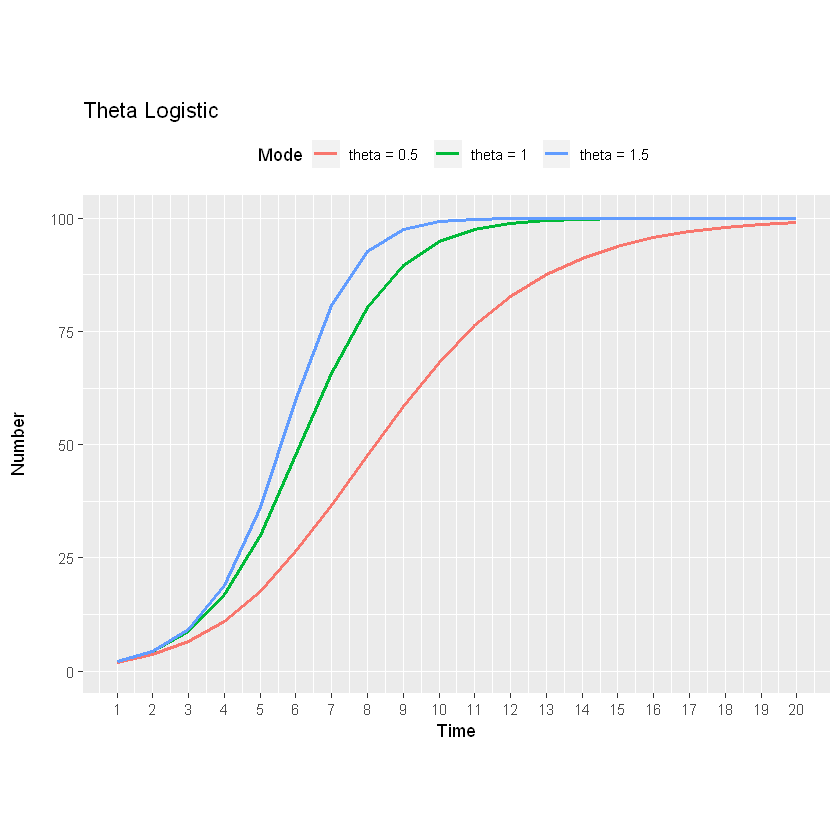

In [258]:
    Fig11 <- data.frame("Time" = theta_frame[1:21,1], "Number" =theta_frame[1:21,2], "Mode" = rep("theta = 0.5", 21))
    Fig12 <- data.frame("Time" = theta_frame[1:21,3], "Number" = theta_frame[1:21,4], "Mode" = rep("theta = 1", 21))
    Fig13 <- data.frame("Time" = theta_frame[1:21,5], "Number" = theta_frame[1:21,6], "Mode" = rep("theta = 1.5", 21))

    
    Fig1 <- rbind(Fig11, Fig12, Fig13)
  
  ggplot(Fig1, aes(x=Time, y= Number, color=Mode)) +
    geom_line(size=1) +
    scale_x_continuous(name="Time",  limits =c(1, 20), breaks=seq(0, 20, 1)) + 
    scale_y_continuous(name="Number\n", limits = c(0, 100)) +
    theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
    ggtitle(label = 'Theta Logistic') 

In [230]:
theta_r_frame <- data.frame (

    Theta_0.5_r = (theta_frame[2:21,2] - theta_frame[1:20,2])/theta_frame[1:20,2],
    Theta_1_r = (theta_frame[2:21,4] - theta_frame[1:20,4])/theta_frame[1:20,4],
    Theta_1.5_r =  (theta_frame[2:21,6] - theta_frame[1:20,6])/theta_frame[1:20,6]
    
)
theta_r_frame

Theta_0.5_r,Theta_1_r,Theta_1.5_r
0.936750250,1.093617e+00,1.114073e+00
0.872371225,1.068622e+00,1.108024e+00
0.792856811,1.019307e+00,1.089819e+00
0.699737010,9.285995e-01,1.037457e+00
0.597278094,7.813910e-01,9.045041e-01
0.492050467,5.850456e-01,6.510406e-01
0.391377129,3.818900e-01,3.522813e-01
0.301399721,2.200962e-01,1.469392e-01
0.225732647,1.160314e-01,5.268321e-02
0.165277864,5.798800e-02,1.771134e-02


Warning message:
"Removed 7 rows containing missing values (geom_path)."

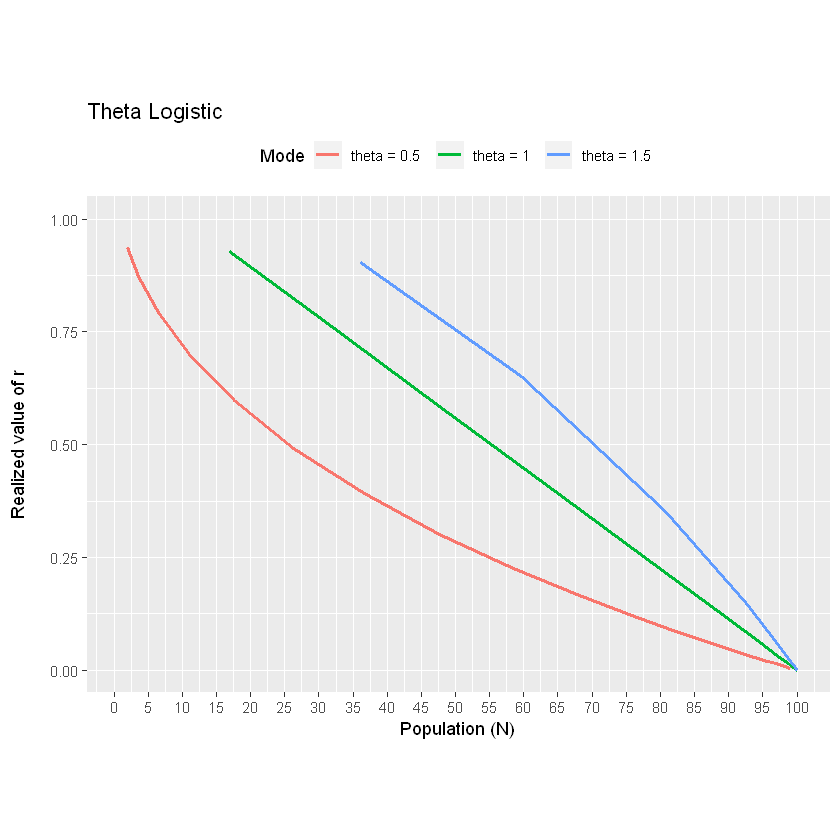

In [253]:


    Fig11 <- data.frame("Population" = theta_frame[2:21,2], "Realized_value_of_r" =theta_r_frame[,1], "Mode" = rep("theta = 0.5", 20))
    Fig12 <- data.frame("Population" = theta_frame[2:21,4], "Realized_value_of_r" = theta_r_frame[,2], "Mode" = rep("theta = 1", 20))
    Fig13 <- data.frame("Population" = theta_frame[2:21,6], "Realized_value_of_r" = theta_r_frame[,3], "Mode" = rep("theta = 1.5", 20))

    
    Fig1 <- rbind(Fig11, Fig12, Fig13)
  
  ggplot(Fig1, aes(x=Population, y= Realized_value_of_r, color=Mode)) +
    geom_line(size=1) +
    scale_x_continuous(name="Population (N)",  limits =c(1, 100), breaks=seq(0, 100, 5)) + 
    scale_y_continuous(name="Realized value of r\n", limits = c(0, 1)) +
    theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
    ggtitle(label = 'Theta Logistic') 

In [276]:
theta_r_frame <- data.frame (

    Theta_0.5_r = (theta_frame[2:21,2] - theta_frame[1:20,2]),
    Theta_1_r = (theta_frame[2:21,4] - theta_frame[1:20,4]),
    Theta_1.5_r =  (theta_frame[2:21,6] - theta_frame[1:20,6])
    
)
theta_r_frame

Theta_0.5_r,Theta_1_r,Theta_1.5_r
0.9367502,1.093617441,1.114073e+00
1.6895652,2.237286343,2.342444e+00
2.8751489,4.414519865,4.856795e+00
4.5493152,8.120996242,9.662157e+00
6.6003885,13.179269127,1.716339e+01
8.6852655,17.578097634,2.352787e+01
10.3074778,18.187047015,2.101947e+01
11.0444646,14.484711813,1.185597e+01
10.7648233,9.316806478,4.875418e+00
9.6610200,5.196440640,1.725396e+00


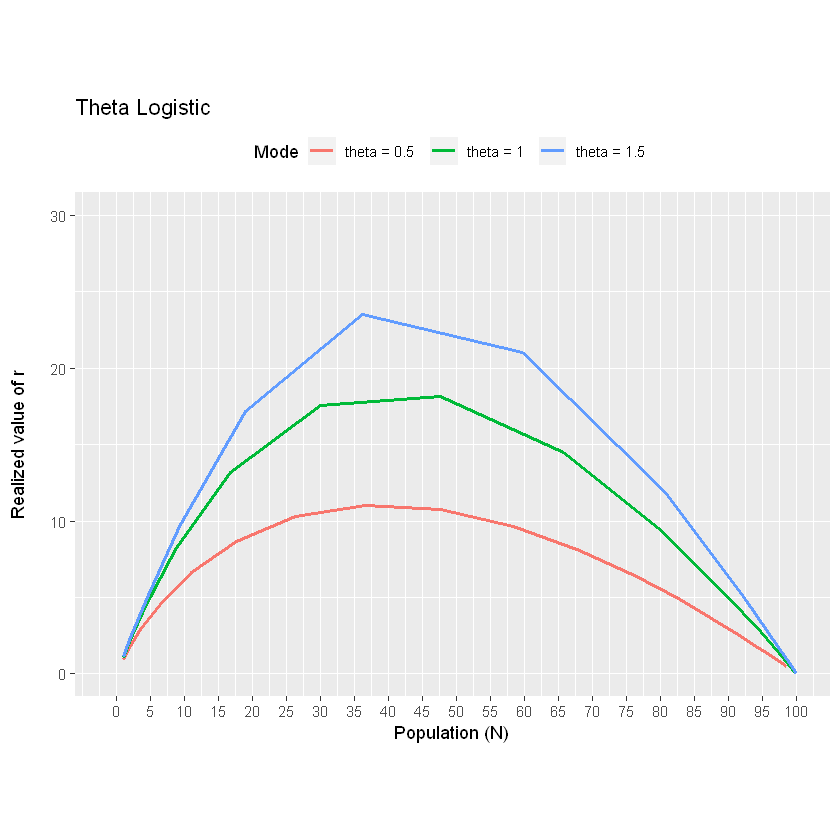

In [277]:
    Fig11 <- data.frame("Population" = theta_frame[1:20,2], "Realized_value_of_r" =theta_r_frame[1:20,1], "Mode" = rep("theta = 0.5", 20))
    Fig12 <- data.frame("Population" = theta_frame[1:20,4], "Realized_value_of_r" = theta_r_frame[1:20,2], "Mode" = rep("theta = 1", 20))
    Fig13 <- data.frame("Population" = theta_frame[1:20,6], "Realized_value_of_r" = theta_r_frame[1:20,3], "Mode" = rep("theta = 1.5", 20))

    
    Fig1 <- rbind(Fig11, Fig12, Fig13)
  
  ggplot(Fig1, aes(x=Population, y= Realized_value_of_r, color=Mode)) +
    geom_line(size=1) +
    scale_x_continuous(name="Population (N)",  limits =c(-1, 100), breaks=seq(0, 100, 5)) + 
    scale_y_continuous(name="Realized value of r\n", limits = c(0, 30)) +
    theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
    ggtitle(label = 'Theta Logistic') 

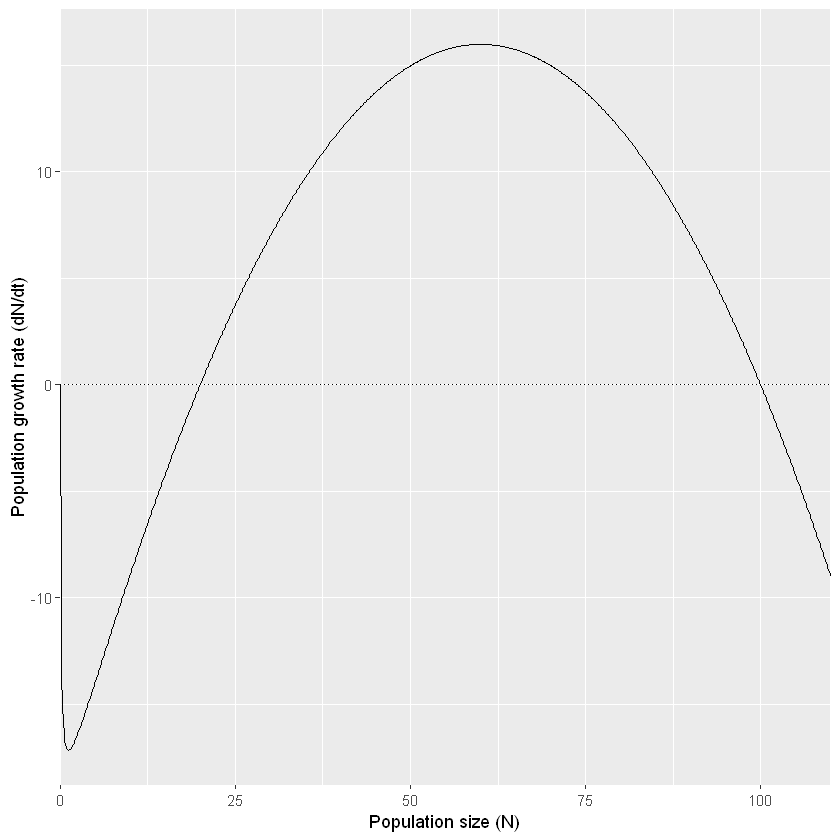

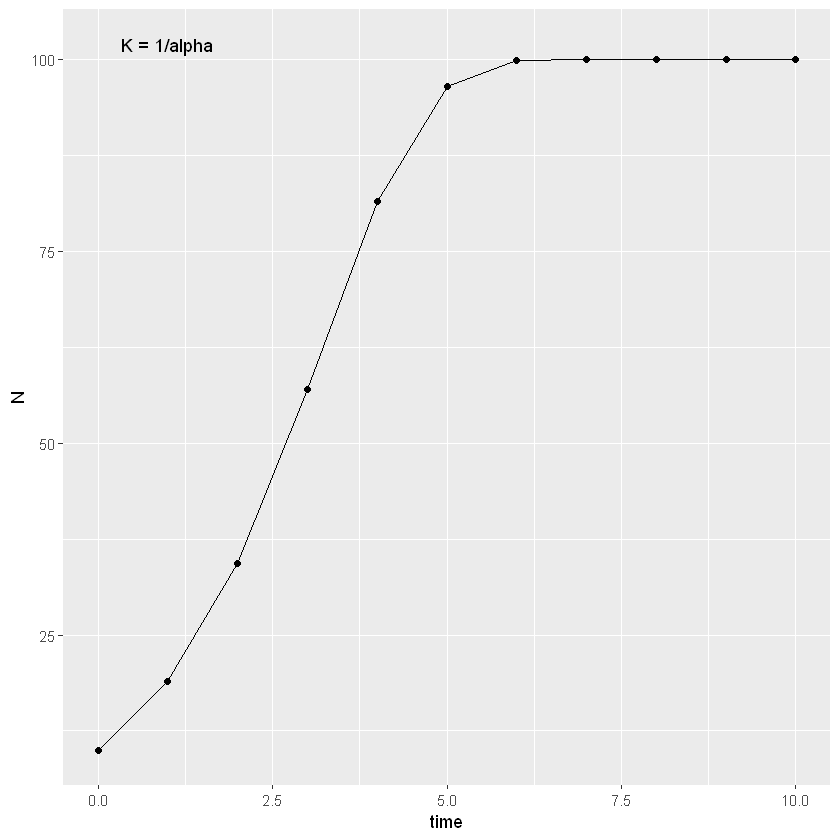

In [288]:
dlogistic <- function (t, y, p) {
  N <- y[1]
  with( as.list(p),{
      N.diff <-  rd * N * (1 - alpha * N) 
      return(list(N.diff))  }) }

p <- c(rd=1, alpha=.01)
y <- c(N=10)
years <- 0:10
outd <- ode(func = dlogistic, y = y, times = years,
 parms = p, method = "euler")
outd <- as.data.frame(outd)
ggplot(outd, aes(x=time, N)) + geom_line() + geom_point() +
  annotate("text", x=1, y =1/p["alpha"]+2, label="K = 1/alpha")


t,rd=1.3,rd=1.6,rd=1.9,rd=2.2,rd=2.5,rd=2.8
0,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000
1,21.70000,24.40000,27.10000,29.80000,32.50000,35.20000
2,43.78843,53.91424,64.63621,75.82312,87.34375,99.06688
3,75.78684,93.66910,108.06606,116.15278,114.97986,101.65524
4,99.64235,103.15726,91.50439,74.87659,71.92031,96.94386
5,100.10563,97.94615,106.27472,116.26201,122.40781,105.23953
6,99.96817,101.16481,93.60468,74.66763,53.83554,89.80017
7,100.00954,99.27940,104.97868,116.28081,115.96775,115.44667
8,99.99714,100.42405,95.04823,74.63161,69.67414,65.51520
9,100.00086,99.74269,103.99072,116.28385,122.49735,128.77500


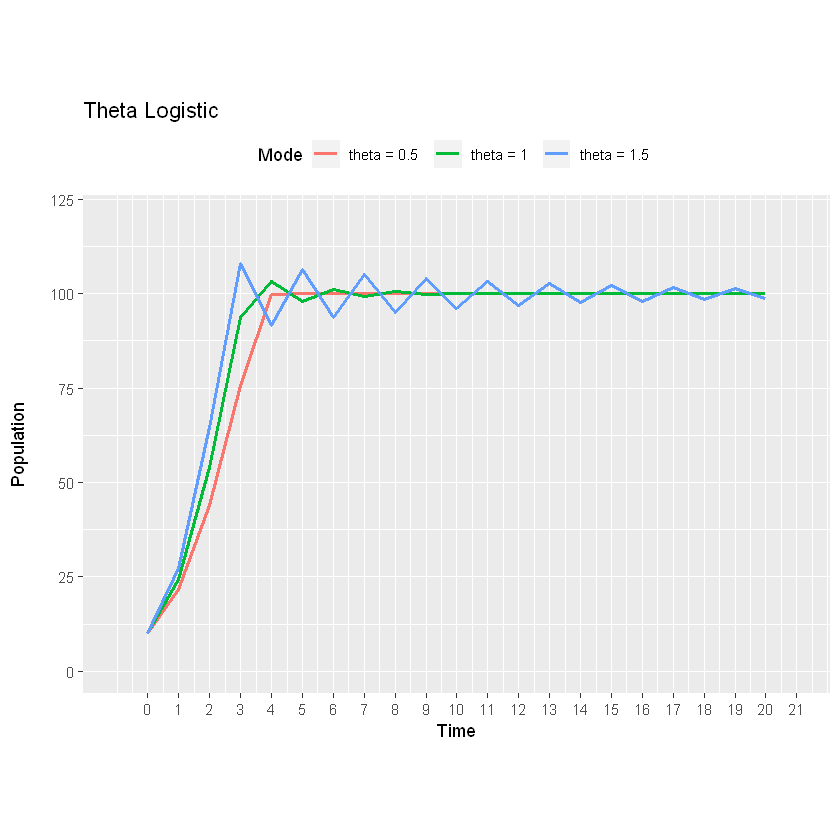

In [299]:

rd.v <- seq(1.3, 2.8, by=.3)
N0 <- c(N=10); t = 0:20
Ns <- sapply(rd.v, function(r) {
  p <- c(rd=r, alpha=0.01)
  outd <- ode(func = dlogistic, y = N0, times = t,
 parms = p, method = "euler")[,2]
  }
 ) 
out <- data.frame(t=t, Ns)
names(out) <- c("t", paste("rd=",rd.v, sep=""))
out

    Fig11 <- data.frame("Time" = out[,1], "Population" = out[,2], "Mode" = rep("theta = 0.5", 21))
    Fig12 <- data.frame("Time" =  out[,1], "Population" = out[,3], "Mode" = rep("theta = 1", 21))
    Fig13 <- data.frame("Time" =  out[,1], "Population" = out[,4], "Mode" = rep("theta = 1.5", 21))

    
    Fig1 <- rbind(Fig11, Fig12, Fig13)
  
  ggplot(Fig1, aes(x=Time, y= Population, color=Mode)) +
    geom_line(size=1) +
    scale_x_continuous(name="Time",  limits =c(-1, 21), breaks=seq(0, 21, 1)) + 
    scale_y_continuous(name="Population\n", limits = c(0, 120)) +
    theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
    ggtitle(label = 'Theta Logistic') 